## Data cleaning

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('../data/raw/03_corporate_transactions.csv')
print('This dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

C:\Users\zowie\anaconda3\envs\mlops\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\zowie\anaconda3\envs\mlops\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\zowie\anaconda3\envs\mlops\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


This dataset has 15156 rows and 8 columns


In [2]:
df.head()

,FISCAL_YR,FISCAL_MTH,DEPT_NAME,DIV_NAME,MERCHANT,CAT_DESC,TRANS_DT,AMT
0,2017,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,DOUBLETREE HOTELS WASHING,LODGING,6/3/2016,-5.50
1,2017,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2016,18.31
2,2017,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2016,21.61
3,2017,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2016,22.39
4,2017,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2016,5.44


In [3]:
df.dtypes

FISCAL_YR       int64
FISCAL_MTH      int64
DEPT_NAME      object
DIV_NAME       object
MERCHANT       object
CAT_DESC       object
TRANS_DT       object
AMT           float64
dtype: object

### replace spaces in text with '_'  to accomodate column names when performing one hot encoding

In [5]:

to_replace = ['DEPT_NAME','DIV_NAME','MERCHANT','CAT_DESC']

for i in to_replace:
    df[i] = df[i].str.replace(' ', '_')

In [7]:
df.head()

,FISCAL_YR,FISCAL_MTH,DEPT_NAME,DIV_NAME,MERCHANT,CAT_DESC,TRANS_DT,AMT
0,2017,1,DEPT_OF_EDUCATION,DEPARTMENT_OF_EDUCATION,DOUBLETREE_HOTELS_WASHING,LODGING,6/3/2016,-5.50
1,2017,1,DEPT_OF_EDUCATION,DEPARTMENT_OF_EDUCATION,HYATT_REGENCY_NW_ORLE_F/B,EATING_PLACES_RESTAURANTS,6/26/2016,18.31
2,2017,1,DEPT_OF_EDUCATION,DEPARTMENT_OF_EDUCATION,HYATT_REGENCY_NW_ORLE_F/B,EATING_PLACES_RESTAURANTS,6/26/2016,21.61
3,2017,1,DEPT_OF_EDUCATION,DEPARTMENT_OF_EDUCATION,HYATT_REGENCY_NW_ORLE_F/B,EATING_PLACES_RESTAURANTS,6/26/2016,22.39
4,2017,1,DEPT_OF_EDUCATION,DEPARTMENT_OF_EDUCATION,HYATT_REGENCY_NW_ORLE_F/B,EATING_PLACES_RESTAURANTS,6/26/2016,5.44


### convert date to datetime object

In [8]:
from datetime import datetime

def changetime(x):
    try:
        return pd.to_datetime(x)
    except:
        return x


In [9]:
# convert to datetime
df["TRANS_DT"] = df["TRANS_DT"].apply(lambda x: changetime(x))

df.head()

,FISCAL_YR,FISCAL_MTH,DEPT_NAME,DIV_NAME,MERCHANT,CAT_DESC,TRANS_DT,AMT
0,2017,1,DEPT_OF_EDUCATION,DEPARTMENT_OF_EDUCATION,DOUBLETREE_HOTELS_WASHING,LODGING,2016-06-03 00:00:00,-5.50
1,2017,1,DEPT_OF_EDUCATION,DEPARTMENT_OF_EDUCATION,HYATT_REGENCY_NW_ORLE_F/B,EATING_PLACES_RESTAURANTS,2016-06-26 00:00:00,18.31
2,2017,1,DEPT_OF_EDUCATION,DEPARTMENT_OF_EDUCATION,HYATT_REGENCY_NW_ORLE_F/B,EATING_PLACES_RESTAURANTS,2016-06-26 00:00:00,21.61
3,2017,1,DEPT_OF_EDUCATION,DEPARTMENT_OF_EDUCATION,HYATT_REGENCY_NW_ORLE_F/B,EATING_PLACES_RESTAURANTS,2016-06-26 00:00:00,22.39
4,2017,1,DEPT_OF_EDUCATION,DEPARTMENT_OF_EDUCATION,HYATT_REGENCY_NW_ORLE_F/B,EATING_PLACES_RESTAURANTS,2016-06-26 00:00:00,5.44


In [10]:
# check for invalid date values

badindex = []

for index, i in enumerate(df["TRANS_DT"]):
    if len(str(i)) < 11:
        print(i)
        badindex.append(index)

2/29/2018
2/29/2018
2/29/2018
2/29/2018


In [11]:
# drop rows with invalid date
print('index of rows with invalid date:', badindex)

print('number of rows before removing invalid date values' , df.shape[0])
df=df.drop(badindex,axis=0)
df=df.reset_index(drop=True)
print('number of rows before removing invalid date values' , df.shape[0])

index of rows with invalid date: [5154, 5155, 5156, 5157]
number of rows before removing invalid date values 15156
number of rows before removing invalid date values 15152


In [12]:
df.dtypes

FISCAL_YR       int64
FISCAL_MTH      int64
DEPT_NAME      object
DIV_NAME       object
MERCHANT       object
CAT_DESC       object
TRANS_DT       object
AMT           float64
dtype: object

### add day of the week

In [13]:
#     check if date is weekend
def isweekday(dd):
    weekno = dd.weekday()

    if weekno < 5:
        return 1
    else:  # 5 Sat, 6 Sun
        return 0

In [14]:
df["DayOfWeek"] = df["TRANS_DT"].apply(lambda x: x.strftime("%A"))
df["isWeekday"] = df["TRANS_DT"].apply(lambda x: isweekday(x))

In [15]:
df.head()

,FISCAL_YR,FISCAL_MTH,DEPT_NAME,DIV_NAME,MERCHANT,CAT_DESC,TRANS_DT,AMT,DayOfWeek,isWeekday
0,2017,1,DEPT_OF_EDUCATION,DEPARTMENT_OF_EDUCATION,DOUBLETREE_HOTELS_WASHING,LODGING,2016-06-03 00:00:00,-5.50,Friday,1
1,2017,1,DEPT_OF_EDUCATION,DEPARTMENT_OF_EDUCATION,HYATT_REGENCY_NW_ORLE_F/B,EATING_PLACES_RESTAURANTS,2016-06-26 00:00:00,18.31,Sunday,0
2,2017,1,DEPT_OF_EDUCATION,DEPARTMENT_OF_EDUCATION,HYATT_REGENCY_NW_ORLE_F/B,EATING_PLACES_RESTAURANTS,2016-06-26 00:00:00,21.61,Sunday,0
3,2017,1,DEPT_OF_EDUCATION,DEPARTMENT_OF_EDUCATION,HYATT_REGENCY_NW_ORLE_F/B,EATING_PLACES_RESTAURANTS,2016-06-26 00:00:00,22.39,Sunday,0
4,2017,1,DEPT_OF_EDUCATION,DEPARTMENT_OF_EDUCATION,HYATT_REGENCY_NW_ORLE_F/B,EATING_PLACES_RESTAURANTS,2016-06-26 00:00:00,5.44,Sunday,0


Distribution of dayofweek and isweekday

Tuesday      1076
Wednesday    1258
Monday       2058
Thursday     2142
Sunday       2774
Friday       2866
Saturday     2978
Name: DayOfWeek, dtype: int64


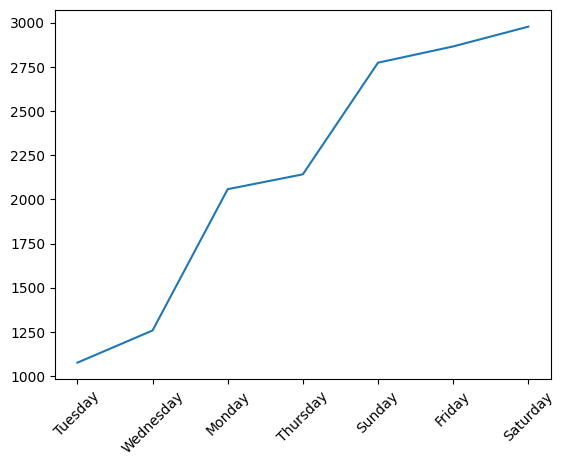

In [16]:
daySorted = df.DayOfWeek.value_counts().sort_values()
print(daySorted)
sns.lineplot(x=daySorted.index, y=daySorted.values)
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='isWeekday', ylabel='count'>

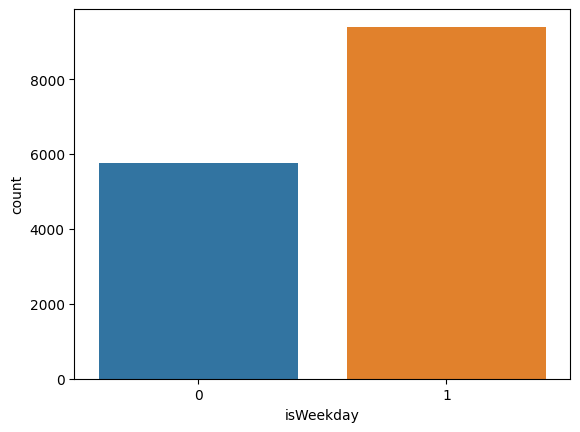

In [17]:
sns.countplot(x=df.isWeekday)

### normalise case of text values

In [18]:
# before normalising case

print('Number of Divisions: ', df.DIV_NAME.nunique())
print('Number of Merchants: ', df.MERCHANT.nunique())
print('Number of Categories: ', df.CAT_DESC.nunique())

Number of Divisions:  25
Number of Merchants:  5802
Number of Categories:  208


In [19]:
# convert divisions, merchants and categories to upper case
df['DIV_NAME'] = df['DIV_NAME'].str.upper()
df['MERCHANT'] = df['MERCHANT'].str.upper()
df['CAT_DESC'] = df['CAT_DESC'].str.upper()


In [20]:
print('Number of Divisions: ', df.DIV_NAME.nunique())
print('Number of Merchants: ', df.MERCHANT.nunique())
print('Number of Categories: ', df.CAT_DESC.nunique())

Number of Divisions:  19
Number of Merchants:  5770
Number of Categories:  121


Number of Divisions:  19


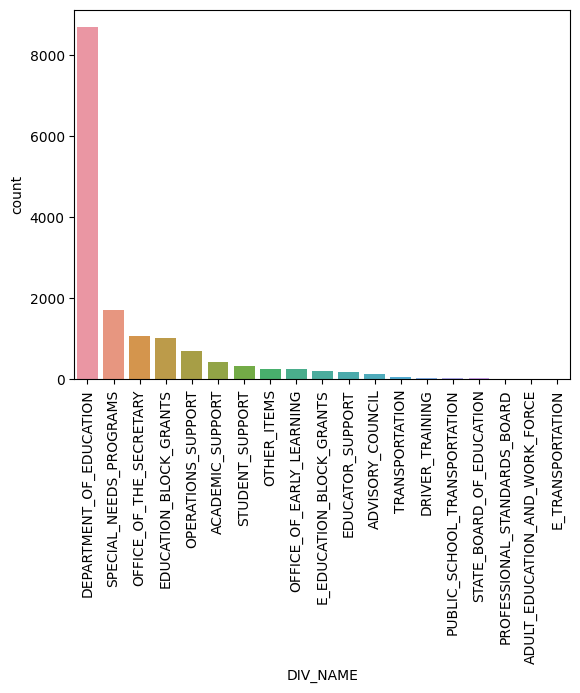

In [21]:
print('Number of Divisions: ', df.DIV_NAME.nunique())

# Limit number of categories shown
order = df["DIV_NAME"].value_counts().iloc[:20].index
sns.countplot(x="DIV_NAME", data=df, order=order)
plt.xticks(rotation=90)
plt.show()

Number of Merchants:  5770


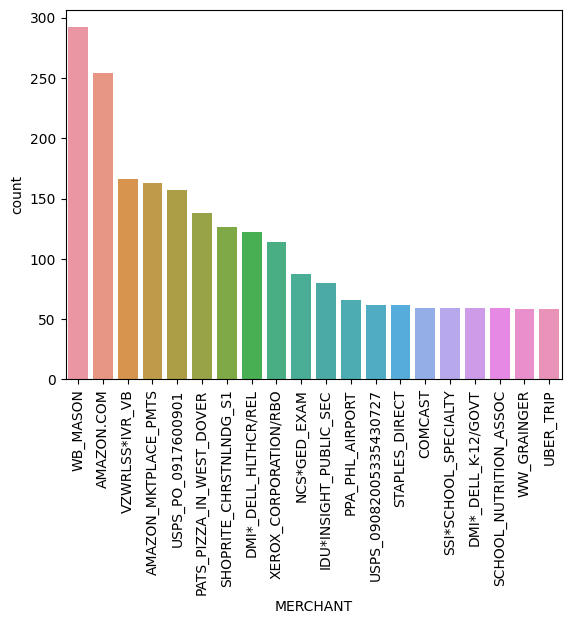

In [22]:
print('Number of Merchants: ', df.MERCHANT.nunique())

# Limit number of categories shown
order = df["MERCHANT"].value_counts().iloc[:20].index
sns.countplot(x="MERCHANT", data=df, order=order)
plt.xticks(rotation=90)
plt.show()

In [23]:
print(df.DIV_NAME.value_counts())

DEPARTMENT_OF_EDUCATION           8691
SPECIAL_NEEDS_PROGRAMS            1711
OFFICE_OF_THE_SECRETARY           1081
EDUCATION_BLOCK_GRANTS            1026
OPERATIONS_SUPPORT                 693
ACADEMIC_SUPPORT                   431
STUDENT_SUPPORT                    332
OTHER_ITEMS                        256
OFFICE_OF_EARLY_LEARNING           253
E_EDUCATION_BLOCK_GRANTS           204
EDUCATOR_SUPPORT                   181
ADVISORY_COUNCIL                   128
TRANSPORTATION                      69
DRIVER_TRAINING                     32
PUBLIC_SCHOOL_TRANSPORTATION        27
STATE_BOARD_OF_EDUCATION            22
PROFESSIONAL_STANDARDS_BOARD         6
ADULT_EDUCATION_AND_WORK_FORCE       6
E_TRANSPORTATION                     3
Name: DIV_NAME, dtype: int64


Number of Categories:  121


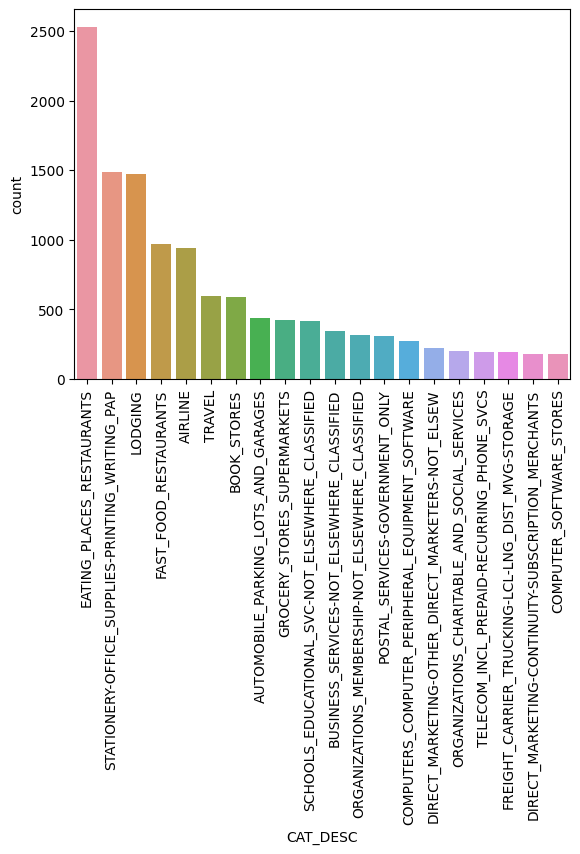

In [24]:
print('Number of Categories: ', df.CAT_DESC.nunique())

# Limit number of categories shown
order = df["CAT_DESC"].value_counts().iloc[:20].index
sns.countplot(x="CAT_DESC", data=df, order=order)
plt.xticks(rotation=90)
plt.show()

In [25]:
print('This dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

This dataset has 15152 rows and 10 columns


In [26]:
df.head()

,FISCAL_YR,FISCAL_MTH,DEPT_NAME,DIV_NAME,MERCHANT,CAT_DESC,TRANS_DT,AMT,DayOfWeek,isWeekday
0,2017,1,DEPT_OF_EDUCATION,DEPARTMENT_OF_EDUCATION,DOUBLETREE_HOTELS_WASHING,LODGING,2016-06-03 00:00:00,-5.50,Friday,1
1,2017,1,DEPT_OF_EDUCATION,DEPARTMENT_OF_EDUCATION,HYATT_REGENCY_NW_ORLE_F/B,EATING_PLACES_RESTAURANTS,2016-06-26 00:00:00,18.31,Sunday,0
2,2017,1,DEPT_OF_EDUCATION,DEPARTMENT_OF_EDUCATION,HYATT_REGENCY_NW_ORLE_F/B,EATING_PLACES_RESTAURANTS,2016-06-26 00:00:00,21.61,Sunday,0
3,2017,1,DEPT_OF_EDUCATION,DEPARTMENT_OF_EDUCATION,HYATT_REGENCY_NW_ORLE_F/B,EATING_PLACES_RESTAURANTS,2016-06-26 00:00:00,22.39,Sunday,0
4,2017,1,DEPT_OF_EDUCATION,DEPARTMENT_OF_EDUCATION,HYATT_REGENCY_NW_ORLE_F/B,EATING_PLACES_RESTAURANTS,2016-06-26 00:00:00,5.44,Sunday,0


In [27]:
df.dtypes

FISCAL_YR       int64
FISCAL_MTH      int64
DEPT_NAME      object
DIV_NAME       object
MERCHANT       object
CAT_DESC       object
TRANS_DT       object
AMT           float64
DayOfWeek      object
isWeekday       int64
dtype: object

In [28]:
# write our clean data file

df.to_csv('C:/Users/zowie/OneDrive/Desktop/MLOPS/assignmentPoetry/AnomalyPrediction/data/processed/cleanAnomaly.csv', index=False)